In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df=pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
df['species']=LabelEncoder().fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [9]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [10]:
df.drop(['sepal_width'],axis=1,inplace=True)

In [11]:
df.isnull().sum()

sepal_length    0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
x=df.drop(['species'],axis=1)
y=df['species']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Train Model

#### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegressionCV

def train_logistic_model():
    model=LogisticRegressionCV()
    model.fit(x_train,y_train)
    return model

In [15]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn_model():
    model=KNeighborsClassifier()
    model.fit(x_train,y_train)
    return model

In [16]:
from sklearn.svm import SVC

def train_svm_model():
    model=SVC()
    model.fit(x_train,y_train)
    return model

In [17]:
from sklearn.tree import DecisionTreeClassifier

def train_decision_model():
    model=DecisionTreeClassifier()
    model.fit(x_train,y_train)
    return model

In [18]:
from sklearn.ensemble import RandomForestClassifier

def train_random_model():
    model=RandomForestClassifier()
    model.fit(x_train,y_train)
    return model

In [19]:
from xgboost import XGBClassifier

def create_xgb_model():
    model = XGBClassifier(n_estimators=35, max_depth=2, learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [20]:
from sklearn.ensemble import AdaBoostClassifier

def create_adaboost_model():
    model = AdaBoostClassifier(n_estimators=35, learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [21]:
from catboost import CatBoostClassifier

def create_catboost_model():
    model = CatBoostClassifier(learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

### Model Evaluate

In [22]:
models = []
models.append({"name": "Logistic Regression", "model": train_logistic_model()})
models.append({"name": "KNN", "model": train_knn_model()})
models.append({"name": "SVM", "model": train_svm_model()})
models.append({"name": "Decision Tree", "model": train_decision_model()})
models.append({"name": "Random Forest", "model": train_random_model()})
models.append({"name": "XGBoost", "model": create_xgb_model()})
models.append({"name": "AdaBoost", "model": create_adaboost_model()})
models.append({"name": "CatBoost", "model": create_catboost_model()})

0:	learn: 0.8727570	total: 141ms	remaining: 2m 20s
1:	learn: 0.7251677	total: 142ms	remaining: 1m 10s
2:	learn: 0.6121478	total: 144ms	remaining: 47.7s
3:	learn: 0.5343261	total: 145ms	remaining: 36.1s
4:	learn: 0.4737272	total: 147ms	remaining: 29.2s
5:	learn: 0.4235553	total: 147ms	remaining: 24.4s
6:	learn: 0.3741574	total: 148ms	remaining: 21s
7:	learn: 0.3412338	total: 149ms	remaining: 18.5s
8:	learn: 0.3071632	total: 150ms	remaining: 16.5s
9:	learn: 0.2833859	total: 152ms	remaining: 15s
10:	learn: 0.2643896	total: 153ms	remaining: 13.8s
11:	learn: 0.2477595	total: 155ms	remaining: 12.8s
12:	learn: 0.2341504	total: 156ms	remaining: 11.9s
13:	learn: 0.2211810	total: 158ms	remaining: 11.1s
14:	learn: 0.2063253	total: 160ms	remaining: 10.5s
15:	learn: 0.1964414	total: 162ms	remaining: 9.94s
16:	learn: 0.1862845	total: 163ms	remaining: 9.44s
17:	learn: 0.1775593	total: 165ms	remaining: 9.01s
18:	learn: 0.1699967	total: 167ms	remaining: 8.62s
19:	learn: 0.1572535	total: 169ms	remaining

### evaluate model

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = []

for item in models:
    model_name = item["name"]
    model = item["model"]

    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    print(f"\n {model_name}")
    print("Confusion Matrix:")
    print(cm)

    results.append([model_name, acc, prec, rec, f1])


 Logistic Regression
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

 KNN
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

 SVM
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

 Decision Tree
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

 Random Forest
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

 XGBoost
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

 AdaBoost
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

 CatBoost
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [26]:
summary_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

summary_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,1.0,1.0,1.0,1.0
1,KNN,1.0,1.0,1.0,1.0
2,SVM,1.0,1.0,1.0,1.0
3,Decision Tree,1.0,1.0,1.0,1.0
4,Random Forest,1.0,1.0,1.0,1.0
5,XGBoost,1.0,1.0,1.0,1.0
6,AdaBoost,1.0,1.0,1.0,1.0
7,CatBoost,1.0,1.0,1.0,1.0


In [27]:
def visualize_model(info):
    
    y_pred = info["model"].predict(x_test)
    plt.scatter(x_test['petal_length'][y_pred == 0], x_test['petal_width'][y_pred == 0], color="green", label="setosa")
    plt.scatter(x_test['petal_length'][y_pred == 1], x_test['petal_width'][y_pred == 1], color="red", label="virsicolor")
    plt.scatter(x_test['petal_length'][y_pred == 2], x_test['petal_width'][y_pred == 2], color="orange", label="virginica")
    plt.xlabel("petal_length")
    plt.ylabel("petal_width")
    plt.title(f"{info['name']} Visualization ")
    plt.legend()

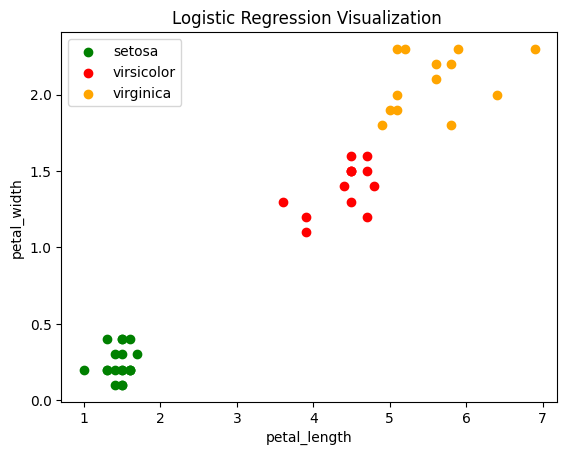

In [28]:
visualize_model(models[0])

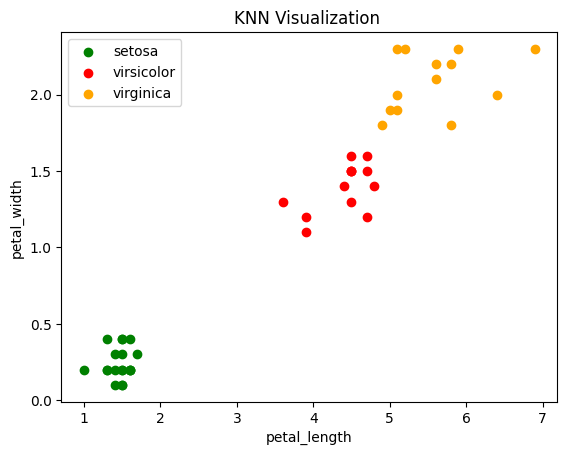

In [29]:
visualize_model(models[1])

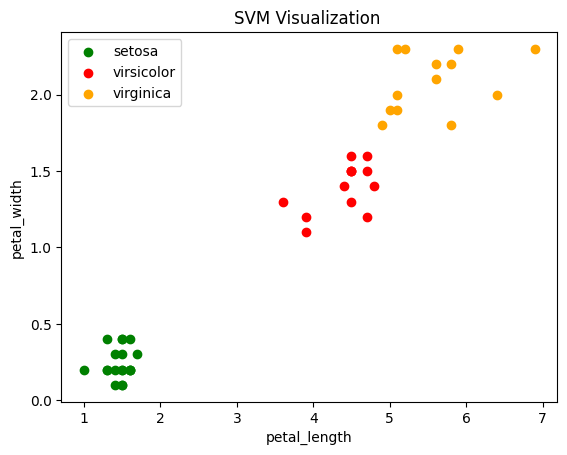

In [30]:
visualize_model(models[2])

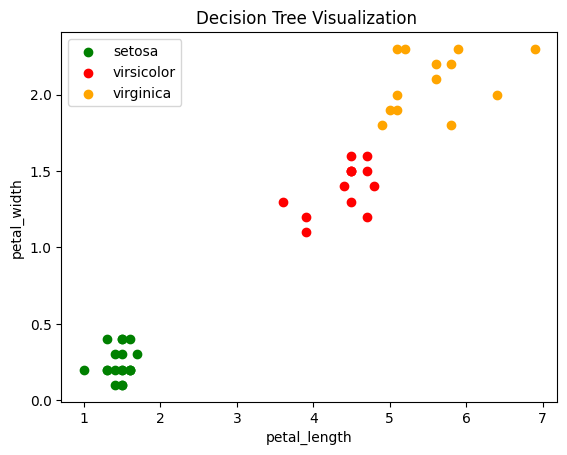

In [32]:
visualize_model(models[3])

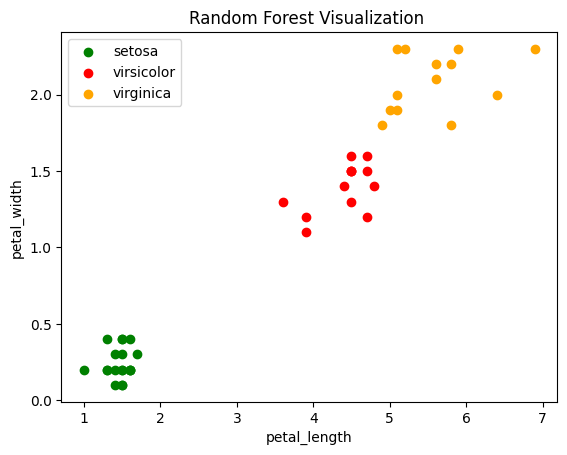

In [33]:
visualize_model(models[4])

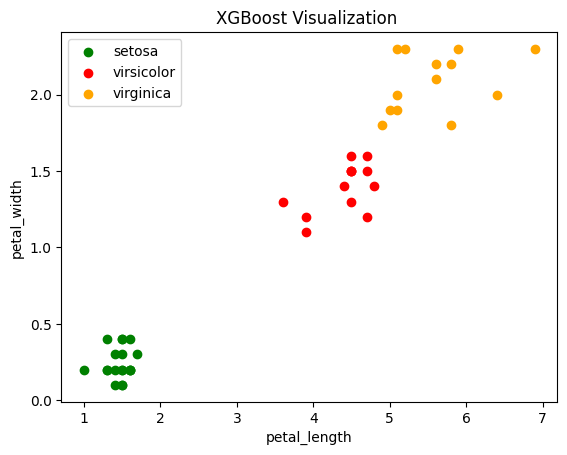

In [34]:
visualize_model(models[5])

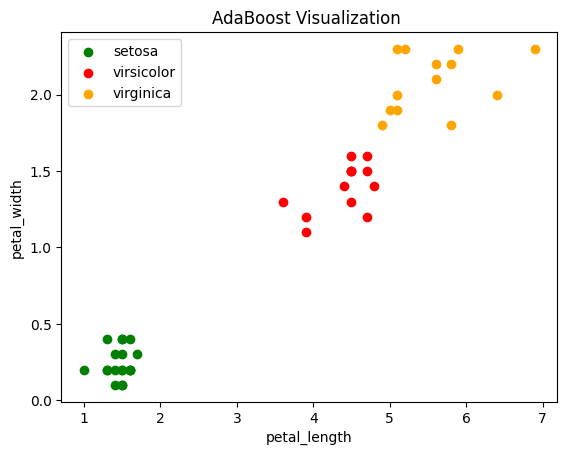

In [35]:
visualize_model(models[6])

In [37]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [41]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [42]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [43]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [46]:
from sklearn.preprocessing import LabelEncoder
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [48]:
from sklearn.preprocessing import StandardScaler
df['Age']=StandardScaler().fit_transform(df[['Age']])
df['Fare']=StandardScaler().fit_transform(df[['Fare']])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2
...,...,...,...,...,...,...,...,...
886,0,2,1,-0.181487,0,0,-0.386671,2
887,1,1,0,-0.796286,0,0,-0.044381,2
888,0,3,0,-0.104637,1,2,-0.176263,2
889,1,1,1,-0.258337,0,0,-0.044381,0


In [49]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


In [50]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Train Models

In [53]:
from sklearn.linear_model import LogisticRegressionCV
def train_logistic_model():
    model=LogisticRegressionCV()
    model.fit(x_train,y_train)
    return model

In [54]:
from sklearn.neighbors import KNeighborsClassifier
def train_knn_model():
    model=KNeighborsClassifier()
    model.fit(x_train,y_train)
    return model

In [55]:
from sklearn.svm import SVC
def train_svm_model():
    model=SVC(C=1,gamma= 'scale',kernel='rbf')
    model.fit(x_train,y_train)
    return model

In [56]:
from sklearn.tree import DecisionTreeClassifier
def train_decision_model():
    model=DecisionTreeClassifier(criterion='entropy', max_depth=10)
    model.fit(x_train,y_train)
    return model

In [57]:
from sklearn.ensemble import RandomForestClassifier
def train_random_model():
    model=RandomForestClassifier(max_depth=5, n_estimators=100)
    model.fit(x_train,y_train)
    return model

In [58]:
from xgboost import XGBClassifier

def create_xgb_model():
    model = XGBClassifier(n_estimators=35, max_depth=2, learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [59]:
from sklearn.ensemble import AdaBoostClassifier

def create_adaboost_model():
    model = AdaBoostClassifier(n_estimators=35, learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [60]:
from catboost import CatBoostClassifier

def create_catboost_model():
    model = CatBoostClassifier(learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [61]:
models = []
models.append({"name": "Logistic Regression", "model": train_logistic_model()})
models.append({"name": "KNN", "model": train_knn_model()})
models.append({"name": "SVM", "model": train_svm_model()})
models.append({"name": "Decision Tree", "model": train_decision_model()})
models.append({"name": "Random Forest", "model": train_random_model()})
models.append({"name": "XGBoost", "model": create_xgb_model()})
models.append({"name": "AdaBoost", "model": create_adaboost_model()})
models.append({"name": "CatBoost", "model": create_catboost_model()})

0:	learn: 0.5669620	total: 3.52ms	remaining: 3.51s
1:	learn: 0.4883668	total: 5.3ms	remaining: 2.65s
2:	learn: 0.4485611	total: 6.84ms	remaining: 2.27s
3:	learn: 0.4217498	total: 9.13ms	remaining: 2.27s
4:	learn: 0.4015378	total: 11ms	remaining: 2.19s
5:	learn: 0.3897916	total: 12.6ms	remaining: 2.09s
6:	learn: 0.3816120	total: 13.9ms	remaining: 1.98s
7:	learn: 0.3777046	total: 15.3ms	remaining: 1.9s
8:	learn: 0.3733806	total: 17ms	remaining: 1.87s
9:	learn: 0.3688048	total: 18.6ms	remaining: 1.84s
10:	learn: 0.3635058	total: 20.5ms	remaining: 1.85s
11:	learn: 0.3585667	total: 22.2ms	remaining: 1.83s
12:	learn: 0.3560047	total: 23.8ms	remaining: 1.81s
13:	learn: 0.3509074	total: 25.4ms	remaining: 1.79s
14:	learn: 0.3469377	total: 27.5ms	remaining: 1.81s
15:	learn: 0.3466011	total: 29ms	remaining: 1.78s
16:	learn: 0.3441188	total: 30.4ms	remaining: 1.76s
17:	learn: 0.3408368	total: 31.9ms	remaining: 1.74s
18:	learn: 0.3390685	total: 33.6ms	remaining: 1.74s
19:	learn: 0.3373616	total: 35

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
results = []

for item in models:
    model_name = item["name"]
    model = item["model"]

    ##Traning Accuracy
    y_train_pred=model.predict(x_train)
    train_acc=accuracy_score(y_train,y_train_pred)

    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n {model_name}")
    print("Confusion Matrix:")
    print(cm)

    results.append([model_name,train_acc,acc, prec, rec, f1,])


 Logistic Regression
Confusion Matrix:
[[137  20]
 [ 30  81]]

 KNN
Confusion Matrix:
[[132  25]
 [ 43  68]]

 SVM
Confusion Matrix:
[[140  17]
 [ 30  81]]

 Decision Tree
Confusion Matrix:
[[144  13]
 [ 44  67]]

 Random Forest
Confusion Matrix:
[[141  16]
 [ 37  74]]

 XGBoost
Confusion Matrix:
[[145  12]
 [ 38  73]]

 AdaBoost
Confusion Matrix:
[[134  23]
 [ 33  78]]

 CatBoost
Confusion Matrix:
[[130  27]
 [ 33  78]]


In [63]:
summary_df = pd.DataFrame(
    results,
    columns=["Model","Training Accuracy","Testing Accuracy", "Precision", "Recall", "F1 Score"]
)

summary_df

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.802568,0.813433,0.801980,0.729730,0.764151
1,KNN,0.841091,0.746269,0.731183,0.612613,0.666667
2,SVM,0.831461,0.824627,0.826531,0.729730,0.775120
3,Decision Tree,0.919743,0.787313,0.837500,0.603604,0.701571
4,Random Forest,0.873194,0.802239,0.822222,0.666667,0.736318
5,XGBoost,0.853933,0.813433,0.858824,0.657658,0.744898
6,AdaBoost,0.786517,0.791045,0.772277,0.702703,0.735849
7,CatBoost,0.980738,0.776119,0.742857,0.702703,0.722222


In [64]:
def visualize_model(info):
    
    y_pred = info["model"].predict(x_test)
    plt.scatter(x_test['Age'][y_pred == 0], x_test['Fare'][y_pred == 0], color="green", label="Survived")
    plt.scatter(x_test['Age'][y_pred == 1], x_test['Fare'][y_pred == 1], color="red", label="Not Survived")
    plt.xlabel("Age")
    plt.ylabel("Fare")
    plt.title(f"{info['name']} Visualization ")
    plt.legend()

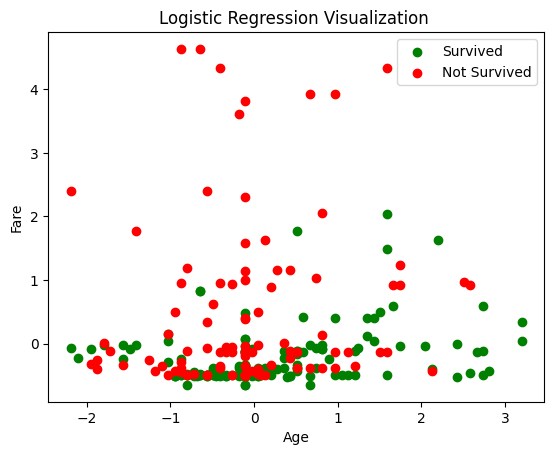

In [65]:
visualize_model(models[0])

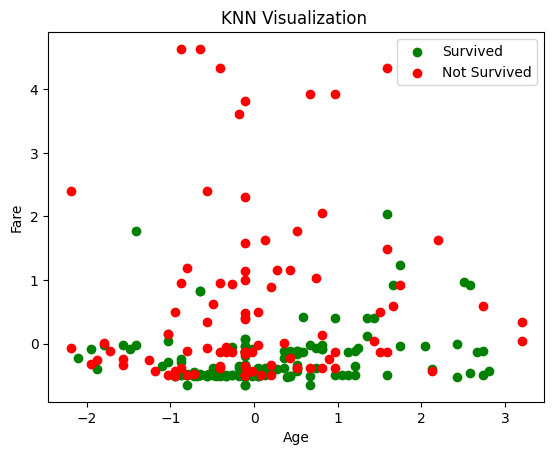

In [66]:
visualize_model(models[1])

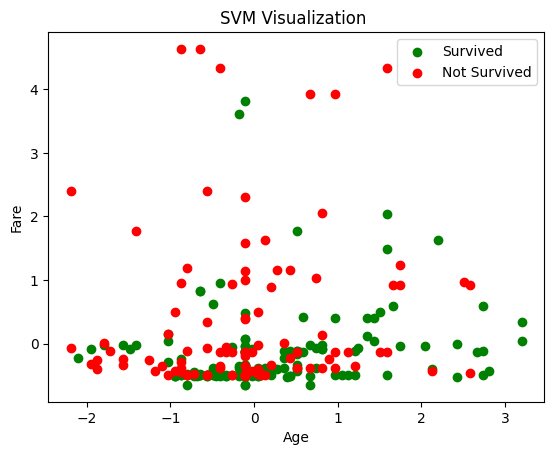

In [67]:
visualize_model(models[2])

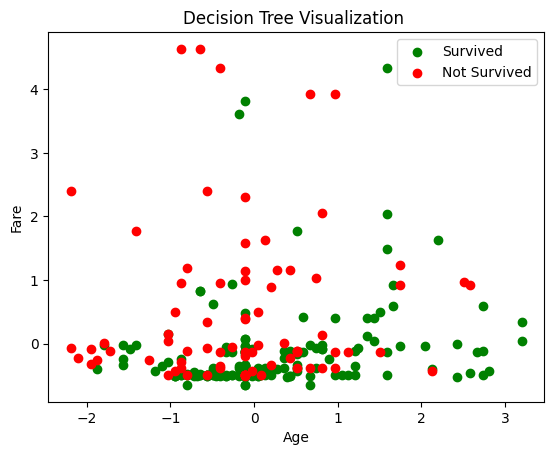

In [68]:
visualize_model(models[3])

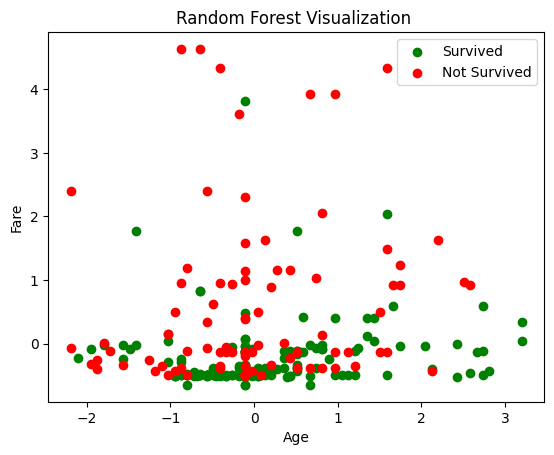

In [69]:
visualize_model(models[4])

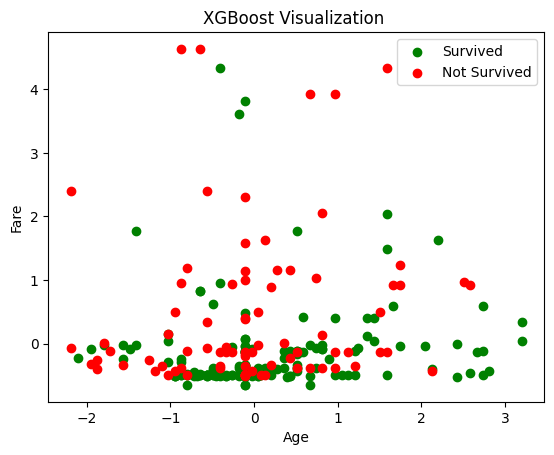

In [70]:
visualize_model(models[5])

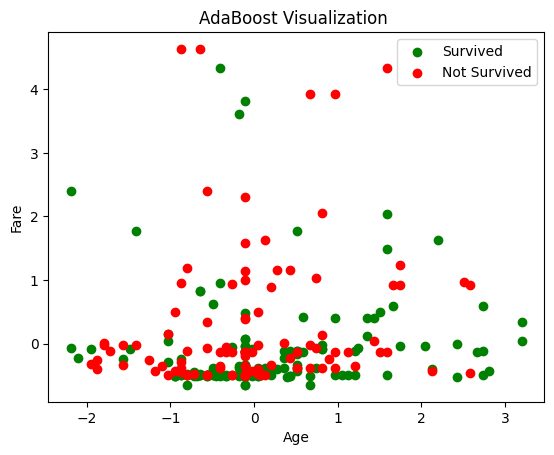

In [71]:
visualize_model(models[6])

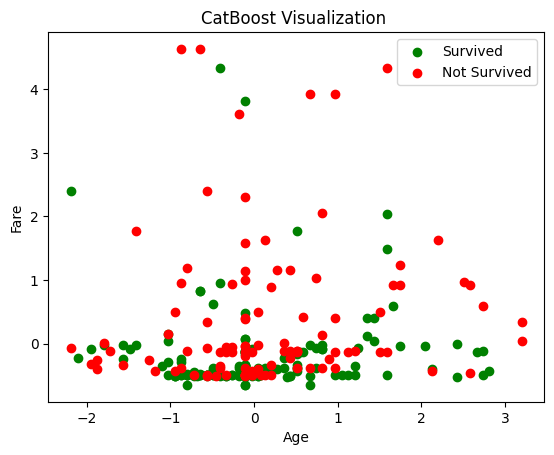

In [72]:
visualize_model(models[7])

In [74]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [79]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

df['Pregnancies']=scalar.fit_transform(df[['Pregnancies']])
df['Glucose']=scalar.fit_transform(df[['Glucose']])
df['BloodPressure']=scalar.fit_transform(df[['BloodPressure']])
df['SkinThickness']=scalar.fit_transform(df[['SkinThickness']])
df['Insulin']=scalar.fit_transform(df[['Insulin']])
df['BMI']=scalar.fit_transform(df[['BMI']])
df['DiabetesPedigreeFunction']=scalar.fit_transform(df[['DiabetesPedigreeFunction']])
df['Age']=scalar.fit_transform(df[['Age']])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [80]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [81]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [82]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [84]:
from sklearn.linear_model import LogisticRegressionCV

def train_logistic_model():
    model=LogisticRegressionCV()
    model.fit(x_train,y_train)
    return model

In [85]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn_model():
    model=KNeighborsClassifier()
    model.fit(x_train,y_train)
    return model

In [86]:
from sklearn.svm import SVC

def train_svm_model():
    model=SVC()
    model.fit(x_train,y_train)
    return model

In [87]:
from sklearn.tree import DecisionTreeClassifier

def train_decision_model():
    model=DecisionTreeClassifier()
    model.fit(x_train,y_train)
    return model

In [88]:
from sklearn.ensemble import RandomForestClassifier

def train_RandomForest_model():
    model=RandomForestClassifier()
    model.fit(x_train,y_train)
    return model

In [89]:
from xgboost import XGBClassifier

def create_xgb_model():
    model = XGBClassifier(n_estimators=35, max_depth=2, learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [90]:
from sklearn.ensemble import AdaBoostClassifier

def create_adaboost_model():
    model = AdaBoostClassifier(n_estimators=35, learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [91]:
from catboost import CatBoostClassifier

def create_catboost_model():
    model = CatBoostClassifier(learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [92]:
models=[]
models.append({"name":"Logistic Regression","model":train_logistic_model()})
models.append({"name":"KNN","model":train_knn_model()})
models.append({"name":"SVM","model":train_svm_model()})
models.append({"name":"DecisionTree","model":train_decision_model()})
models.append({"name":"RandomForest","model":train_RandomForest_model()})
models.append({"name":"XgBoost","model":create_xgb_model()})
models.append({"name":"AdaBoost","model":create_adaboost_model()})
models.append({"name":"CatBoost","model":create_catboost_model()})

0:	learn: 0.5827284	total: 2.35ms	remaining: 2.35s
1:	learn: 0.5370473	total: 4.45ms	remaining: 2.22s
2:	learn: 0.4995051	total: 6.59ms	remaining: 2.19s
3:	learn: 0.4601685	total: 8.49ms	remaining: 2.11s
4:	learn: 0.4340006	total: 11.3ms	remaining: 2.24s
5:	learn: 0.4133713	total: 13.7ms	remaining: 2.27s
6:	learn: 0.3955128	total: 15.9ms	remaining: 2.25s
7:	learn: 0.3661029	total: 18.4ms	remaining: 2.28s
8:	learn: 0.3568225	total: 20.9ms	remaining: 2.29s
9:	learn: 0.3467320	total: 22.9ms	remaining: 2.27s
10:	learn: 0.3361121	total: 24.8ms	remaining: 2.23s
11:	learn: 0.3318776	total: 26.9ms	remaining: 2.21s
12:	learn: 0.3266412	total: 28.8ms	remaining: 2.18s
13:	learn: 0.3149844	total: 30.6ms	remaining: 2.16s
14:	learn: 0.3091183	total: 32.6ms	remaining: 2.14s
15:	learn: 0.3020522	total: 34.5ms	remaining: 2.12s
16:	learn: 0.2962297	total: 36.8ms	remaining: 2.13s
17:	learn: 0.2898353	total: 39ms	remaining: 2.13s
18:	learn: 0.2860258	total: 40.8ms	remaining: 2.1s
19:	learn: 0.2796698	tota

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
results = []

for item in models:
    model_name = item["name"]
    model = item["model"]

    ##Traning Accuracy
    y_train_pred=model.predict(x_train)
    train_acc=accuracy_score(y_train,y_train_pred)

    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n {model_name}")
    print("Confusion Matrix:")
    print(cm)

    results.append([model_name,train_acc,acc, prec, rec, f1,])


 Logistic Regression
Confusion Matrix:
[[124  27]
 [ 33  47]]

 KNN
Confusion Matrix:
[[119  32]
 [ 39  41]]

 SVM
Confusion Matrix:
[[125  26]
 [ 32  48]]

 DecisionTree
Confusion Matrix:
[[111  40]
 [ 26  54]]

 RandomForest
Confusion Matrix:
[[120  31]
 [ 30  50]]

 XgBoost
Confusion Matrix:
[[125  26]
 [ 28  52]]

 AdaBoost
Confusion Matrix:
[[130  21]
 [ 36  44]]

 CatBoost
Confusion Matrix:
[[115  36]
 [ 29  51]]


In [94]:
summary_df = pd.DataFrame(
    results,
    columns=["Model","Training Accuracy","Testing Accuracy", "Precision", "Recall", "F1 Score"]
)

summary_df

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.778399,0.740260,0.635135,0.5875,0.610390
1,KNN,0.823091,0.692641,0.561644,0.5125,0.535948
2,SVM,0.834264,0.748918,0.648649,0.6000,0.623377
3,DecisionTree,1.000000,0.714286,0.574468,0.6750,0.620690
4,RandomForest,1.000000,0.735931,0.617284,0.6250,0.621118
5,XgBoost,0.834264,0.766234,0.666667,0.6500,0.658228
6,AdaBoost,0.789572,0.753247,0.676923,0.5500,0.606897
7,CatBoost,1.000000,0.718615,0.586207,0.6375,0.610778


In [95]:
def visualize_model(info):
    
    y_pred = info["model"].predict(x_test)
    plt.scatter(x_test['Age'][y_pred == 0], x_test['Glucose'][y_pred == 0], color="green", label="not diabetic ")
    plt.scatter(x_test['Age'][y_pred == 1], x_test['Glucose'][y_pred == 1], color="red", label="diabetic ")
    plt.xlabel("Age")
    plt.ylabel("Glucose")
    plt.title(f"{info['name']} Visualization ")
    plt.legend()

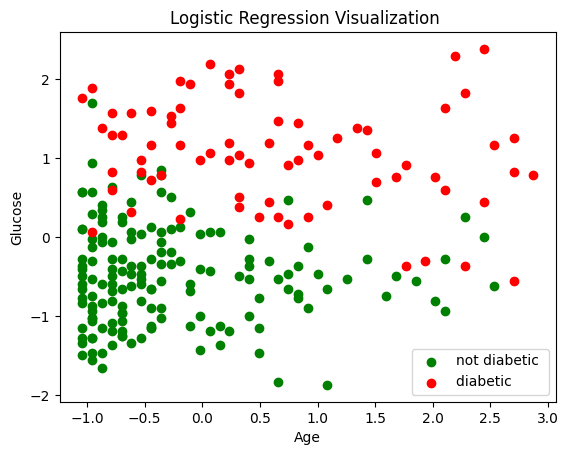

In [96]:
visualize_model(models[0])

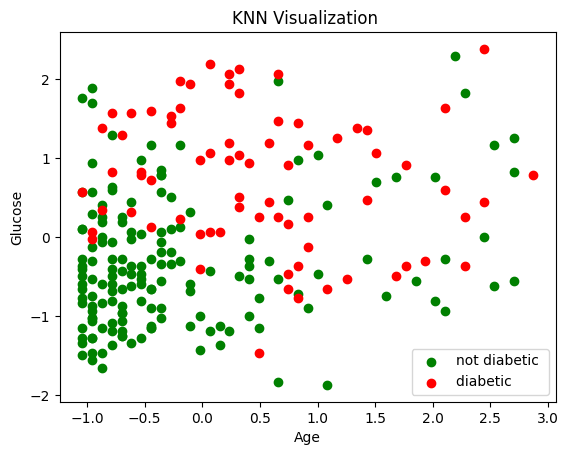

In [97]:
visualize_model(models[1])

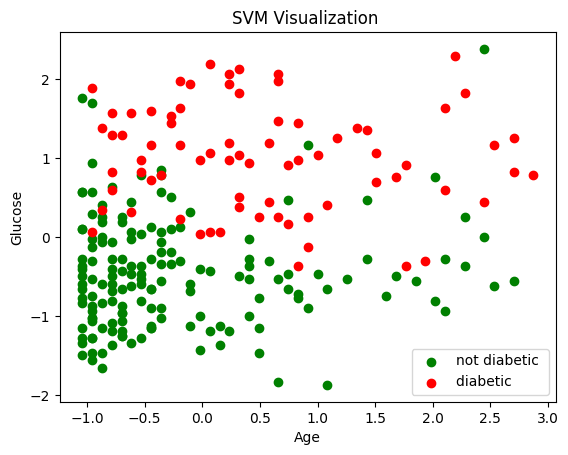

In [98]:
visualize_model(models[2])

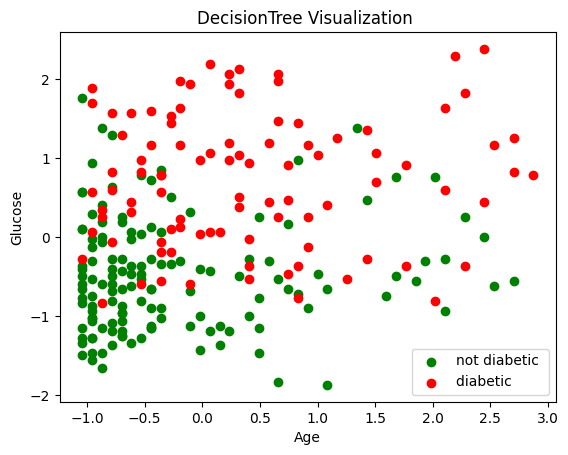

In [99]:
visualize_model(models[3])

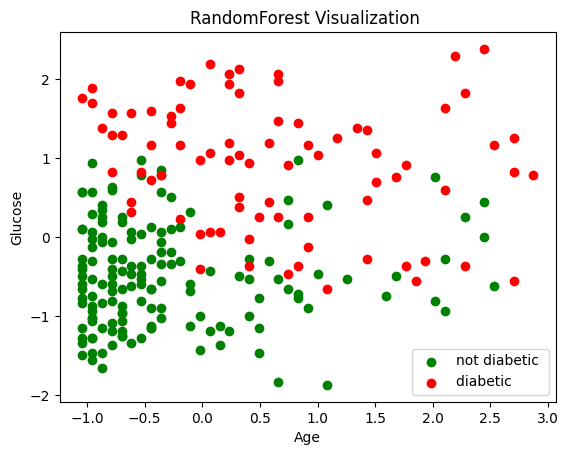

In [100]:
visualize_model(models[4])

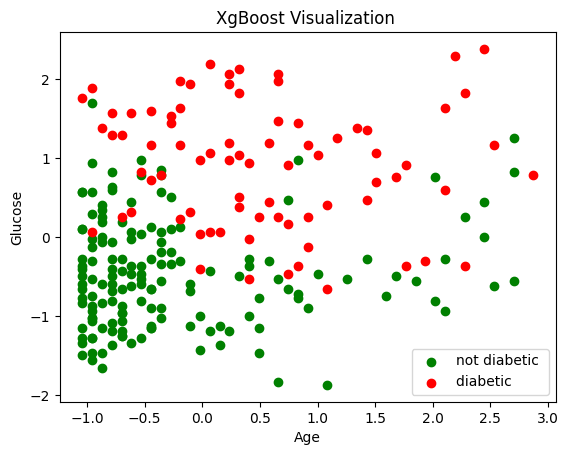

In [101]:
visualize_model(models[5])

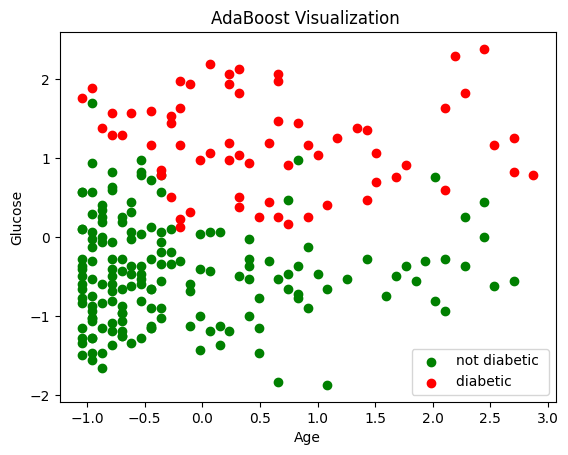

In [102]:
visualize_model(models[6])

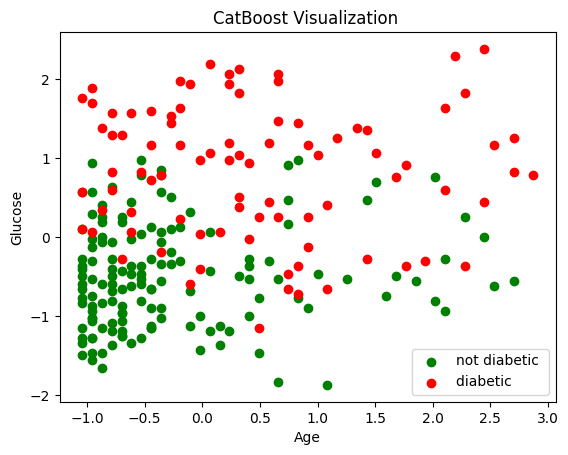

In [103]:
visualize_model(models[7])

In [106]:
df=pd.read_csv("ObesityLevel.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [107]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [110]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df['CALC']=encoder.fit_transform(df['CALC'])
df['FAVC']=encoder.fit_transform(df['FAVC'])
df['SCC']=encoder.fit_transform(df['SCC'])
df['SMOKE']=encoder.fit_transform(df['SMOKE'])
df['family_history_with_overweight']=encoder.fit_transform(df['family_history_with_overweight'])
df['CAEC']=encoder.fit_transform(df['CAEC'])
df['MTRANS']=encoder.fit_transform(df['MTRANS'])

In [111]:
df['NObeyesdad']=encoder.fit_transform(df['NObeyesdad'])
encoder.classes_
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.620000,64.000000,3,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,2,3,1
1,21.000000,0,1.520000,56.000000,2,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,2,3,1
2,23.000000,1,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,2,3,1
3,27.000000,1,1.800000,87.000000,1,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,2,4,5
4,22.000000,1,1.780000,89.800000,2,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,2,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,2,3,4
2107,21.982942,0,1.748584,133.742943,2,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,2,3,4
2108,22.524036,0,1.752206,133.689352,2,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,2,3,4
2109,24.361936,0,1.739450,133.346641,2,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,2,3,4


In [112]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

df['Age']=scalar.fit_transform(df[['Age']])
df['Height']=scalar.fit_transform(df[['Height']])
df['Weight']=scalar.fit_transform(df[['Weight']])
df['CH2O']=scalar.fit_transform(df[['CH2O']])
df['FAF']=scalar.fit_transform(df[['FAF']])
df['TUE']=scalar.fit_transform(df[['TUE']])

In [113]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [114]:
df.corr()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
Age,1.000000,0.048394,-0.025958,0.202560,-0.044487,0.063902,0.016291,-0.043944,-0.116283,0.091987,-0.045304,0.205725,-0.144938,-0.296931,0.083739,-0.601945,0.236170
Gender,0.048394,1.000000,0.618466,0.161668,0.007616,0.064934,-0.274505,0.067600,-0.102633,0.044698,0.107930,0.102512,0.189607,0.017269,0.091543,-0.137537,0.024908
Height,-0.025958,0.618466,1.000000,0.463136,-0.129732,0.178364,-0.038121,0.243672,-0.133753,0.055499,0.213376,0.247684,0.294709,0.051912,0.048818,-0.073609,0.038986
Weight,0.202560,0.161668,0.463136,1.000000,-0.206677,0.272300,0.216125,0.107469,-0.201906,0.025746,0.200575,0.496820,-0.051436,-0.071561,0.287493,0.004610,0.387643
CALC,-0.044487,0.007616,-0.129732,-0.206677,1.000000,-0.089520,-0.060781,-0.071747,-0.003463,-0.082471,-0.091386,0.036676,0.086799,0.045864,-0.047540,-0.012452,-0.134632
FAVC,0.063902,0.064934,0.178364,0.272300,-0.089520,1.000000,-0.027283,-0.007000,-0.190658,-0.050660,0.009719,0.208036,-0.107995,0.068417,0.150068,-0.069800,0.044582
FCVC,0.016291,-0.274505,-0.038121,0.216125,-0.060781,-0.027283,1.000000,0.042216,0.071852,0.014320,0.068461,0.040372,0.019939,-0.101135,-0.054670,0.064743,0.018522
NCP,-0.043944,0.067600,0.243672,0.107469,-0.071747,-0.007000,0.042216,1.000000,-0.015624,0.007811,0.057088,0.071370,0.129504,0.036326,-0.097801,-0.053858,-0.092616
SCC,-0.116283,-0.102633,-0.133753,-0.201906,-0.003463,-0.190658,0.071852,-0.015624,1.000000,0.047731,0.008036,-0.185422,0.074221,-0.010928,-0.109179,0.043157,-0.050679
SMOKE,0.091987,0.044698,0.055499,0.025746,-0.082471,-0.050660,0.014320,0.007811,0.047731,1.000000,-0.031995,0.017385,0.011216,0.017613,-0.055282,-0.010702,-0.023256


In [115]:
x=df.drop('NObeyesdad',axis=1)
y=df['NObeyesdad']

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [117]:
from sklearn.linear_model import LogisticRegressionCV

def train_logistic_model():
    model=LogisticRegressionCV()
    model.fit(x_train,y_train)
    return model

In [118]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn_model():
    model=KNeighborsClassifier()
    model.fit(x_train,y_train)
    return model

In [119]:
from sklearn.svm import SVC

def train_svm_model():
    model=SVC()
    model.fit(x_train,y_train)
    return model

In [120]:
from sklearn.tree import DecisionTreeClassifier

def train_decision_model():
    model=DecisionTreeClassifier()
    model.fit(x_train,y_train)
    return model

In [121]:
from sklearn.ensemble import RandomForestClassifier

def train_RandomForest_model():
    model=RandomForestClassifier()
    model.fit(x_train,y_train)
    return model

In [122]:
from xgboost import XGBClassifier

def create_xgb_model():
    model = XGBClassifier(n_estimators=35, max_depth=2, learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [123]:
from sklearn.ensemble import AdaBoostClassifier

def create_adaboost_model():
    model = AdaBoostClassifier(n_estimators=35, learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [124]:
from catboost import CatBoostClassifier

def create_catboost_model():
    model = CatBoostClassifier(learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [125]:
models=[]
models.append({"name":"Logistic Regression","model":train_logistic_model()})
models.append({"name":"KNN","model":train_knn_model()})
models.append({"name":"SVM","model":train_svm_model()})
models.append({"name":"DecisionTree","model":train_decision_model()})
models.append({"name":"RandomForest","model":train_RandomForest_model()})
models.append({"name":"XgBoost","model":create_xgb_model()})
models.append({"name":"AdaBoost","model":create_adaboost_model()})
models.append({"name":"CatBoost","model":create_catboost_model()})

0:	learn: 1.5350776	total: 18.6ms	remaining: 18.6s
1:	learn: 1.3040670	total: 33.6ms	remaining: 16.8s
2:	learn: 1.1342303	total: 50ms	remaining: 16.6s
3:	learn: 1.0122420	total: 64ms	remaining: 15.9s
4:	learn: 0.8994516	total: 78.4ms	remaining: 15.6s
5:	learn: 0.8347378	total: 93.8ms	remaining: 15.5s
6:	learn: 0.7610696	total: 109ms	remaining: 15.5s
7:	learn: 0.6951474	total: 123ms	remaining: 15.3s
8:	learn: 0.6487804	total: 139ms	remaining: 15.3s
9:	learn: 0.6134395	total: 154ms	remaining: 15.3s
10:	learn: 0.5707806	total: 171ms	remaining: 15.4s
11:	learn: 0.5385574	total: 186ms	remaining: 15.3s
12:	learn: 0.5143406	total: 205ms	remaining: 15.6s
13:	learn: 0.4832329	total: 221ms	remaining: 15.6s
14:	learn: 0.4638625	total: 236ms	remaining: 15.5s
15:	learn: 0.4412929	total: 254ms	remaining: 15.6s
16:	learn: 0.4266246	total: 270ms	remaining: 15.6s
17:	learn: 0.4062594	total: 288ms	remaining: 15.7s
18:	learn: 0.3908412	total: 306ms	remaining: 15.8s
19:	learn: 0.3773401	total: 322ms	remai

In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
results = []

for item in models:
    model_name = item["name"]
    model = item["model"]

    ##Traning Accuracy
    y_train_pred=model.predict(x_train)
    train_acc=accuracy_score(y_train,y_train_pred)

    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred,average='weighted')
    rec = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')

    print(f"\n {model_name}")
    print("Confusion Matrix:")
    print(cm)

    results.append([model_name,train_acc,acc, prec, rec, f1,])


 Logistic Regression
Confusion Matrix:
[[ 86   0   0   0   0   0   0]
 [  6  87   0   0   0   0   0]
 [  0   0 100   1   0   0   1]
 [  0   0   0  88   0   0   0]
 [  0   0   0   1  97   0   0]
 [  0   0   0   0   0  85   3]
 [  0   0   1   0   0   2  76]]

 KNN
Confusion Matrix:
[[85  1  0  0  0  0  0]
 [22 34 10  2  0 13 12]
 [ 0  1 93  6  0  1  1]
 [ 0  0  3 85  0  0  0]
 [ 0  0  0  0 98  0  0]
 [ 3  5  5  1  0 69  5]
 [ 2  0 11  2  1  4 59]]

 SVM
Confusion Matrix:
[[83  3  0  0  0  0  0]
 [ 8 68  0  0  0 14  3]
 [ 0  0 94  6  0  0  2]
 [ 0  0  1 87  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  9  0  0  0 68 11]
 [ 0  0  2  0  0 11 66]]

 DecisionTree
Confusion Matrix:
[[82  4  0  0  0  0  0]
 [ 9 78  0  0  0  6  0]
 [ 0  1 93  4  0  0  4]
 [ 0  0  2 86  0  0  0]
 [ 0  0  1  0 97  0  0]
 [ 0 12  0  0  0 71  5]
 [ 0  0  1  1  0  4 73]]

 RandomForest
Confusion Matrix:
[[82  4  0  0  0  0  0]
 [ 0 86  0  0  0  6  1]
 [ 0  1 97  3  0  1  0]
 [ 0  0  1 87  0  0  0]
 [ 0  0  1  0 97  0  0]
 

In [127]:
summary_df = pd.DataFrame(
    results,
    columns=["Model","Training Accuracy","Testing Accuracy", "Precision", "Recall", "F1 Score"]
)

summary_df

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.979689,0.976341,0.977055,0.976341,0.976357
1,KNN,0.892349,0.824921,0.828701,0.824921,0.810231
2,SVM,0.918754,0.888013,0.889134,0.888013,0.887457
3,DecisionTree,1.000000,0.914826,0.915262,0.914826,0.914554
4,RandomForest,1.000000,0.940063,0.943245,0.940063,0.940734
5,XgBoost,0.943805,0.889590,0.890248,0.889590,0.888995
6,AdaBoost,0.301286,0.288644,0.254019,0.288644,0.200418
7,CatBoost,1.000000,0.957413,0.957724,0.957413,0.957508


In [128]:
def visualize_model(info):
    
    y_pred = info["model"].predict(x_test)
    plt.scatter(x_test['Height'][y_pred == 0], x_test['Weight'][y_pred == 0], color="green", label="Insufficient_Weight")
    plt.scatter(x_test['Height'][y_pred == 1], x_test['Weight'][y_pred == 1], color="red", label="Normal_Weight")
    plt.scatter(x_test['Height'][y_pred == 2], x_test['Weight'][y_pred == 2], color="orange", label="Obesity_Type_I")
    plt.scatter(x_test['Height'][y_pred == 3], x_test['Weight'][y_pred == 3], color="blue", label="Obesity_Type_II")
    plt.scatter(x_test['Height'][y_pred == 4], x_test['Weight'][y_pred == 4], color="black", label="Obesity_Type_III")
    plt.scatter(x_test['Height'][y_pred == 5], x_test['Weight'][y_pred == 5], color="pink", label="Overweight_Level_I")
    plt.scatter(x_test['Height'][y_pred == 5], x_test['Weight'][y_pred == 5], color="brown", label="Overweight_Level_II")
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.title(f"{info['name']} Visualization ")
    plt.legend()

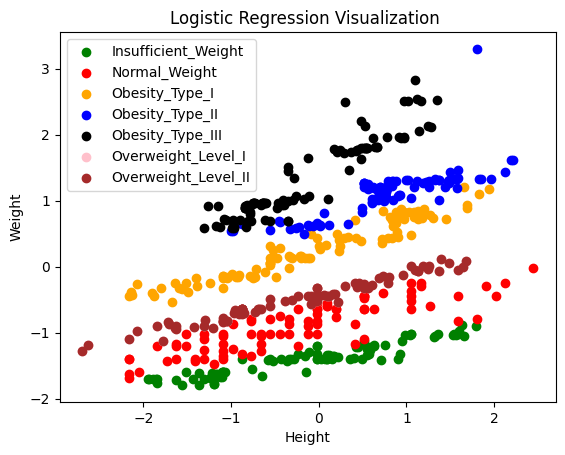

In [129]:
visualize_model(models[0])

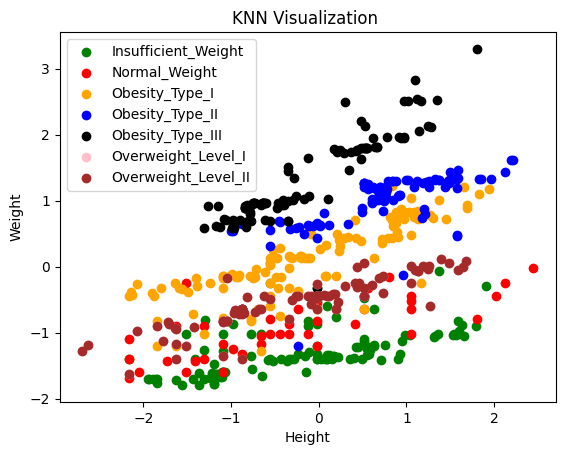

In [130]:
visualize_model(models[1])

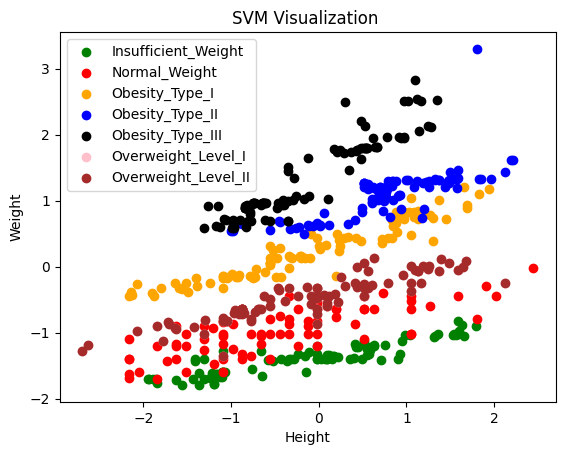

In [131]:
visualize_model(models[2])

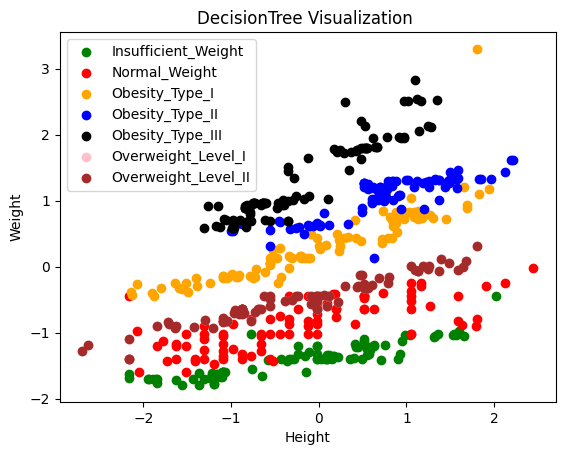

In [133]:
visualize_model(models[3])

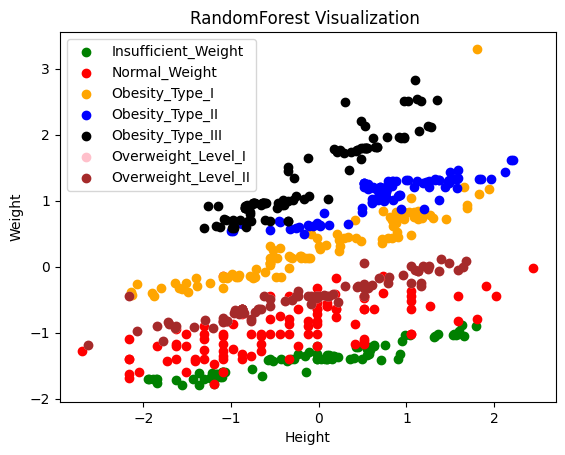

In [134]:
visualize_model(models[4])

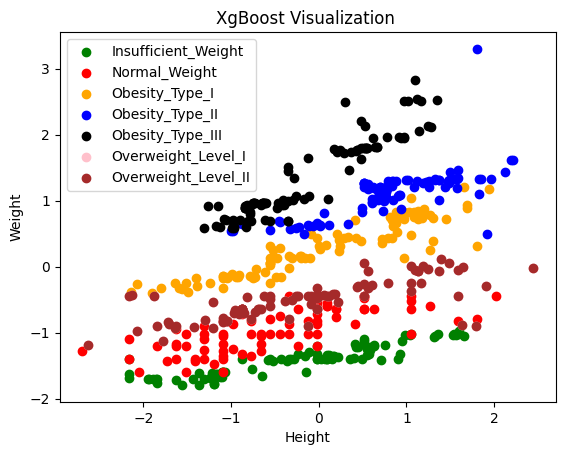

In [135]:
visualize_model(models[5])

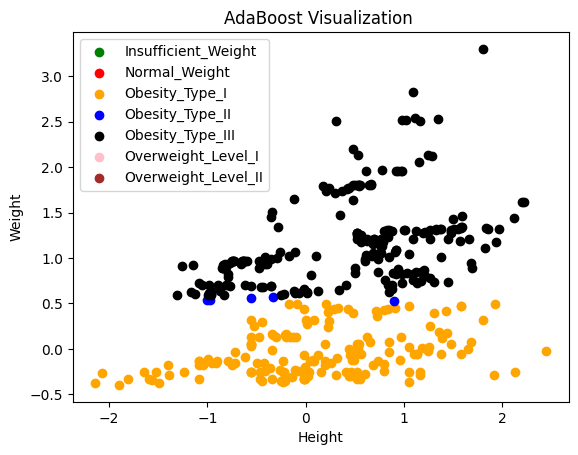

In [136]:
visualize_model(models[6])

In [137]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [138]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [140]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [141]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [142]:
x=df.drop('target',axis=1)
y=df['target']

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [144]:
from sklearn.linear_model import LogisticRegressionCV

def train_logistic_model():
    model=LogisticRegressionCV()
    model.fit(x_train,y_train)
    return model

In [145]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn_model():
    model=KNeighborsClassifier()
    model.fit(x_train,y_train)
    return model

In [146]:
from sklearn.svm import SVC

def train_svm_model():
    model=SVC()
    model.fit(x_train,y_train)
    return model

In [147]:
from sklearn.tree import DecisionTreeClassifier

def train_decision_model():
    model=DecisionTreeClassifier()
    model.fit(x_train,y_train)
    return model

In [148]:
from sklearn.ensemble import RandomForestClassifier

def train_RandomForest_model():
    model=RandomForestClassifier()
    model.fit(x_train,y_train)
    return model

In [149]:
from xgboost import XGBClassifier

def create_xgb_model():
    model = XGBClassifier(n_estimators=35, max_depth=2, learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [150]:
from sklearn.ensemble import AdaBoostClassifier

def create_adaboost_model():
    model = AdaBoostClassifier(n_estimators=35, learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [151]:
from catboost import CatBoostClassifier

def create_catboost_model():
    model = CatBoostClassifier(learning_rate=0.2)
    model.fit(x_train, y_train)
    return model

In [152]:
models=[]
models.append({"name":"Logistic Regression","model":train_logistic_model()})
models.append({"name":"KNN","model":train_knn_model()})
models.append({"name":"SVM","model":train_svm_model()})
models.append({"name":"DecisionTree","model":train_decision_model()})
models.append({"name":"RandomForest","model":train_RandomForest_model()})
models.append({"name":"XgBoost","model":create_xgb_model()})
models.append({"name":"AdaBoost","model":create_adaboost_model()})
models.append({"name":"CatBoost","model":create_catboost_model()})

0:	learn: 0.5346152	total: 2.63ms	remaining: 2.62s
1:	learn: 0.4547702	total: 4.99ms	remaining: 2.49s
2:	learn: 0.4204828	total: 6.96ms	remaining: 2.31s
3:	learn: 0.3743920	total: 8.7ms	remaining: 2.17s
4:	learn: 0.3426363	total: 9.93ms	remaining: 1.98s
5:	learn: 0.3313159	total: 11ms	remaining: 1.82s
6:	learn: 0.3043938	total: 12.7ms	remaining: 1.79s
7:	learn: 0.2829425	total: 14.7ms	remaining: 1.82s
8:	learn: 0.2611574	total: 16.3ms	remaining: 1.8s
9:	learn: 0.2401764	total: 19.2ms	remaining: 1.9s
10:	learn: 0.2301922	total: 21.9ms	remaining: 1.97s
11:	learn: 0.2118297	total: 25.2ms	remaining: 2.07s
12:	learn: 0.1988215	total: 29.2ms	remaining: 2.21s
13:	learn: 0.1873883	total: 32ms	remaining: 2.25s
14:	learn: 0.1781087	total: 35.7ms	remaining: 2.34s
15:	learn: 0.1694395	total: 39.1ms	remaining: 2.4s
16:	learn: 0.1635636	total: 42.6ms	remaining: 2.46s
17:	learn: 0.1541901	total: 46ms	remaining: 2.51s
18:	learn: 0.1481573	total: 48ms	remaining: 2.48s
19:	learn: 0.1411490	total: 50.6ms

In [153]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
results = []

for item in models:
    model_name = item["name"]
    model = item["model"]

    ##Traning Accuracy
    y_train_pred=model.predict(x_train)
    train_acc=accuracy_score(y_train,y_train_pred)

    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n {model_name}")
    print("Confusion Matrix:")
    print(cm)

    results.append([model_name,train_acc,acc, prec, rec, f1,])


 Logistic Regression
Confusion Matrix:
[[32  9]
 [10 40]]

 KNN
Confusion Matrix:
[[24 17]
 [14 36]]

 SVM
Confusion Matrix:
[[19 22]
 [ 5 45]]

 DecisionTree
Confusion Matrix:
[[31 10]
 [14 36]]

 RandomForest
Confusion Matrix:
[[32  9]
 [ 8 42]]

 XgBoost
Confusion Matrix:
[[32  9]
 [ 8 42]]

 AdaBoost
Confusion Matrix:
[[31 10]
 [ 7 43]]

 CatBoost
Confusion Matrix:
[[34  7]
 [11 39]]


In [154]:
summary_df = pd.DataFrame(
    results,
    columns=["Model","Training Accuracy","Testing Accuracy", "Precision", "Recall", "F1 Score"]
)

summary_df

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.863208,0.791209,0.816327,0.80,0.808081
1,KNN,0.768868,0.659341,0.679245,0.72,0.699029
2,SVM,0.660377,0.703297,0.671642,0.90,0.769231
3,DecisionTree,1.000000,0.736264,0.782609,0.72,0.750000
4,RandomForest,1.000000,0.813187,0.823529,0.84,0.831683
5,XgBoost,0.929245,0.813187,0.823529,0.84,0.831683
6,AdaBoost,0.867925,0.813187,0.811321,0.86,0.834951
7,CatBoost,1.000000,0.802198,0.847826,0.78,0.812500


In [155]:
def visualize_model(info):
    
    y_pred = info["model"].predict(x_test)
    plt.scatter(x_test['age'][y_pred == 0], x_test['thalach'][y_pred == 0], color="green", label="no heart disease ")
    plt.scatter(x_test['age'][y_pred == 1], x_test['thalach'][y_pred == 1], color="red", label="has heart disease")
    plt.xlabel("age")
    plt.ylabel("thalach")
    plt.title(f"{info['name']} Visualization ")
    plt.legend()

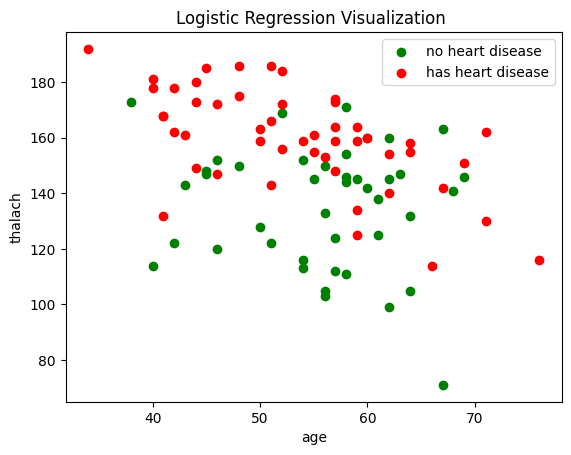

In [156]:
visualize_model(models[0])

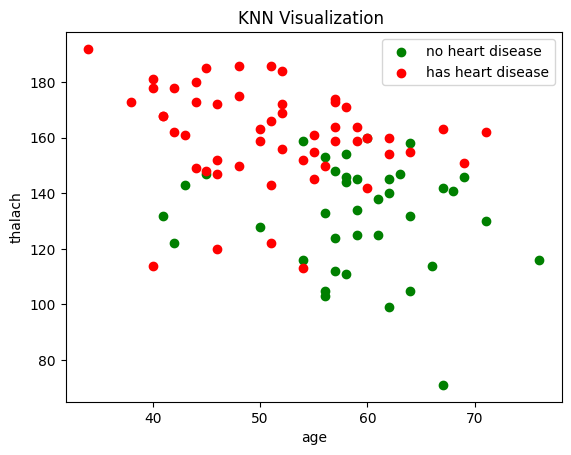

In [157]:
visualize_model(models[1])

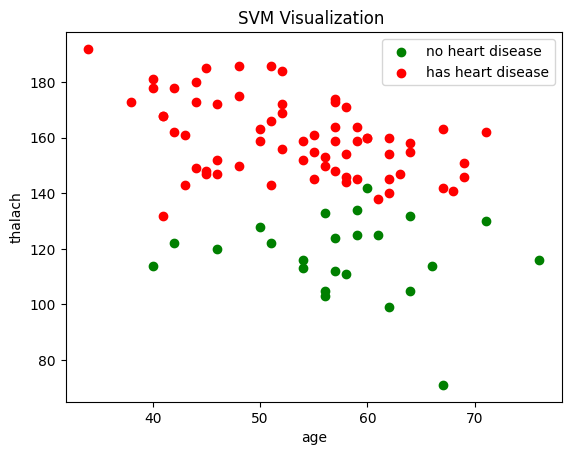

In [158]:
visualize_model(models[2])

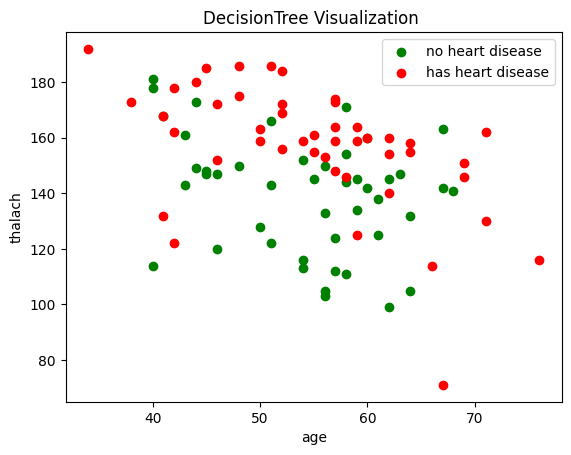

In [159]:
visualize_model(models[3])

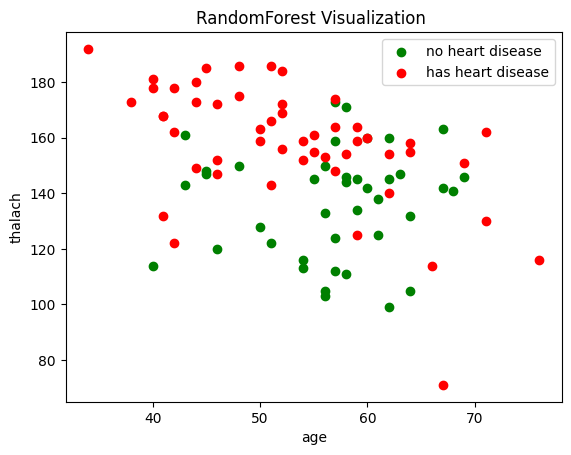

In [160]:
visualize_model(models[4])

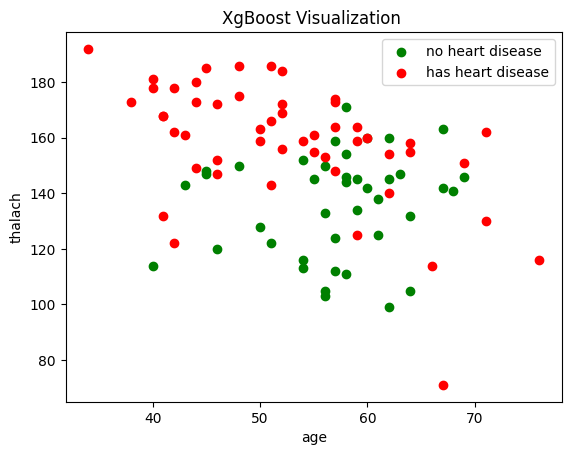

In [161]:
visualize_model(models[5])

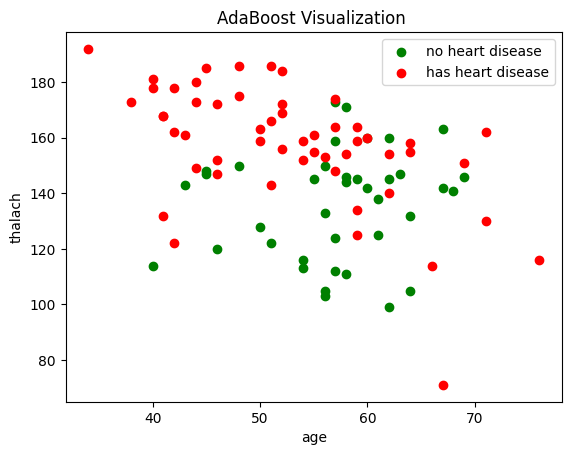

In [162]:
visualize_model(models[6])